In [1]:
import os
import shutil

import yaml
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
import galsim

from lsst.meas.deblender import display

import utils

In [320]:
import imp
imp.reload(utils)

with open('settings.yaml') as f:
    # use safe_load instead load
    settings = yaml.safe_load(f)
seed = settings["seed"]
np.random.seed(seed)
rng = galsim.BaseDeviate(seed+1)

In [321]:
save_path = os.path.join(os.path.abspath("."), settings["output_dir"])
for f in os.listdir(save_path):
    filename = os.path.join(save_path, f)
    if os.path.isfile(filename):
        os.remove(filename)
shutil.copy2('settings.yaml', save_path)

'/Users/fred/lsst/code/testdata_deblender/sim_data/matched_real/settings.yaml'

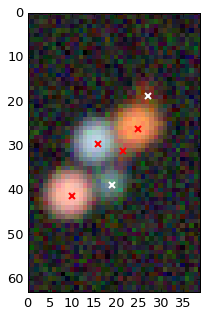

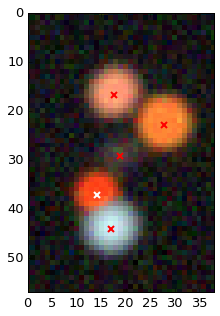

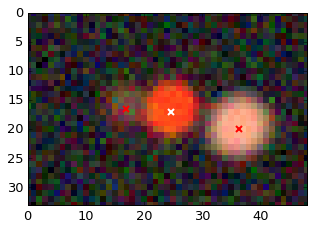

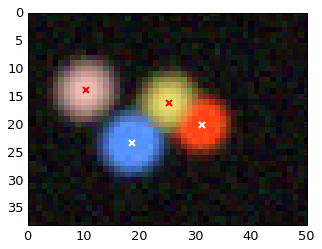

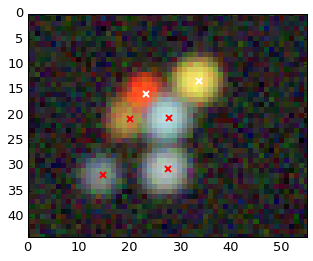

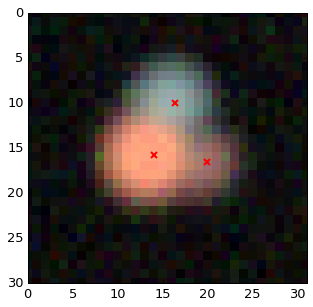

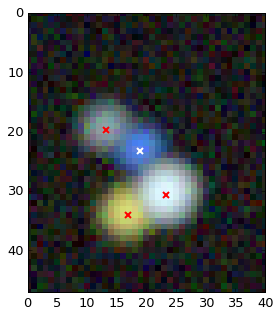

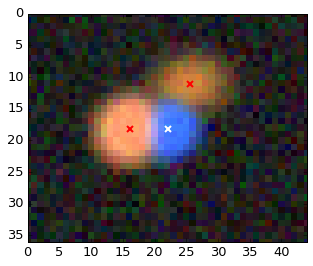

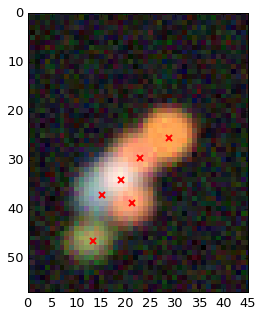

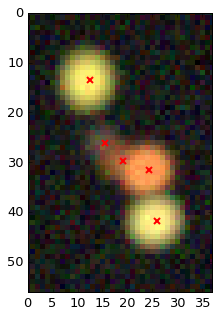

In [322]:
psfs = None
filters = [f for f in settings["filters"]["files"]["names"]]
for n in range(10):
    if psfs is None:
        blend, sources, psfs = utils.create_blend(rng, settings)
        _psfs = []
        for f,psf in psfs.items():
            _psfs.append(psf.drawImage(nx=31,ny=31, scale=1).array)
        _psfs = np.array(_psfs)
        np.savez(os.path.join(save_path, "psfs".format(f)), psfs=_psfs, filters=filters)
    else:
        blend, sources, psfs = utils.create_blend(rng, settings, psfs=psfs)
    coords = [(s.x, s.y) for s in sources]
    images = np.array([b.array for b in blend.values()])
    catalog = utils.build_catalog(sources)
    np.savez(os.path.join(save_path, "images_{0}".format(n)), images=images, filters=filters)
    catalog.write(os.path.join(save_path, "true_catalog_{0}.fits".format(n)))
    
    display.plotColorImage(images, show=False)
    for n,(x, y) in enumerate(coords):
        if sources[n].is_star:
            marker = "wx"
        else:
            marker = "rx"
        plt.plot(x, y, marker, mew=2)
    plt.xlim([0, images.shape[2]-1])
    plt.ylim([images.shape[1]-1, 0])
    plt.show()